In [1]:
import numpy as np
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
import keras

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print(x_train.shape,y_train.shape) 
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


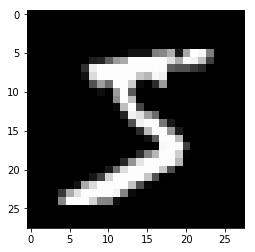

5

In [3]:
import matplotlib.pyplot as plt 
im = plt.imshow(x_train[0],cmap='gray')
plt.show()
y_train[0]

In [4]:
x_train = x_train.reshape(60000,784) 
x_test = x_test.reshape(10000,784) 

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train)
scaler.fit_transform(x_test)

/Users/shexiangxin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

Required DNN has five hidden layers with increased size

In [8]:
DNN = Sequential() 

In [9]:
DNN.add(Dense(8,activation='relu',input_shape=(28*28,)))
DNN.add(Dense(16,activation='relu'))
DNN.add(Dense(32,activation='relu'))
DNN.add(Dense(64,activation='relu'))
DNN.add(Dense(128,activation='relu'))
DNN.add(Dense(10,activation='softmax'))
DNN.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 18,690
Trainable params: 18,690
No

In [10]:
DNN.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [11]:
DNN.fit(x_train,y_train,batch_size=64,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.8988 - accuracy: 0.6928
Epoch 2/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.5122 - accuracy: 0.8118
Epoch 3/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.4666 - accuracy: 0.8217
Epoch 4/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.4349 - accuracy: 0.8432
Epoch 5/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.3768 - accuracy: 0.8874


In [12]:
score = DNN.evaluate(x_test, y_test, verbose=0)
print("loss:",score[0])
print("accu:",score[1])

loss: 0.33561114424169064
accu: 0.9031000137329102


Another DNN has five hidden layers with decreased size

In [14]:
DNN_comparison = Sequential() 

In [15]:
DNN_comparison.add(Dense(128,activation='relu',input_shape=(28*28,)))
DNN_comparison.add(Dense(64,activation='relu'))
DNN_comparison.add(Dense(32,activation='relu'))
DNN_comparison.add(Dense(16,activation='relu'))
DNN_comparison.add(Dense(8,activation='relu'))
DNN_comparison.add(Dense(10,activation='softmax'))
DNN_comparison.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                90        
Total params: 111,570
Trainable params: 111,570
Non-trainable params: 0
________________________________________________

In [16]:
DNN_comparison.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [17]:
DNN_comparison.fit(x_train,y_train,batch_size=64,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 16s 270us/step - loss: 1.7279 - accuracy: 0.6358s - loss: 1.7503 - ac
Epoch 2/5
60000/60000 [==============================] - 15s 250us/step - loss: 0.6768 - accuracy: 0.7750
Epoch 3/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.3496 - accuracy: 0.9139
Epoch 4/5
60000/60000 [==============================] - 14s 231us/step - loss: 0.2119 - accuracy: 0.9460
Epoch 5/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.1470 - accuracy: 0.9616


In [18]:
score = DNN_comparison.evaluate(x_test, y_test, verbose=0)
print("loss:",score[0])
print("accu:",score[1])

loss: 0.17464911982268094
accu: 0.955299973487854


In [20]:
x_train = x_train.reshape(60000,28,28,1) 
x_test = x_test.reshape(10000,28,28,1)

In [21]:
CNN = Sequential()

In [22]:
CNN.add(Conv2D(8,kernel_size=(3,3),activation='relu',strides=(1,1),input_shape=(28,28,1)))
CNN.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
CNN.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
CNN.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
CNN.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.25))
CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(10, activation='softmax'))
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

In [23]:
CNN.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
CNN.fit(x_train,y_train,batch_size=64,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 660s 11ms/step - loss: 0.9343 - accuracy: 0.7159
Epoch 2/5
60000/60000 [==============================] - 654s 11ms/step - loss: 0.2590 - accuracy: 0.9241
Epoch 3/5
60000/60000 [==============================] - 653s 11ms/step - loss: 0.1851 - accuracy: 0.9453
Epoch 4/5
60000/60000 [==============================] - 654s 11ms/step - loss: 0.1552 - accuracy: 0.9552
Epoch 5/5
60000/60000 [==============================] - 653s 11ms/step - loss: 0.1341 - accuracy: 0.9612


In [25]:
score = CNN.evaluate(x_test, y_test, verbose=0)
print("loss:",score[0])
print("accu:",score[1])

loss: 0.08130771526173922
accu: 0.9771000146865845


## Accuracy of three methods

1.Homework DNN: 90.3%

2.Extra DNN with decreased hidden layer in DNN size: 95.5%

3.CNN: 97.7%

CNN provides better accuracy because CNN has layers of convolution and pooling. They are able to cut down on the number of parameter by sharing weights. This makes them efficient and generalize much better.

Smaller learning rate could lead to a better result. And the kernal_size is really depend on the dataset and the algorithm applied.